In [1]:
import tabix
import pandas as pd
import os
import numpy as np
import sys
import tqdm.auto as tqdm
sys.path.append(
    os.path.abspath(
        os.path.join(
            "/data/pushkare/Chromatin_modules/4.quantify_3D_interactions", "src"
        )
    )
)
import utils
import peak_matrix_visualization as pmv
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = "test_data"

interaction_types = ["HiC", "MicroC"]
resolutions = [500, 1000]

core_path = os.path.join(
    "/data/pushkare/Chromatin_modules/5.visualize_3D_interactions_and_peak_corr",
    "3D_interactions",
)
cm_path = "/data/pushkare/Chromatin_modules/1.mapped_CMs"
cm_peak_path = "/data/pushkare/Chromatin_modules/2.peaks_in_CMs/peak_files"

In [3]:
target_regions = pd.DataFrame(
    [
        [
            "chr22",
            23349145,
            23692745,
            "chr22_23349145_23692745_BCR",  # B cell receptor
            "crd76",
            "",
            "",
        ]
    ],
    columns=["chr_id", "start", "end", "pid", "cm_id", "rs_id", "LD_rs_ids"],
)

In [4]:
for interaction_type in interaction_types:
    for resolution in resolutions:
        query = zip(
            target_regions["chr_id"],
            target_regions["start"],
            target_regions["end"],
            target_regions["pid"],
            target_regions["cm_id"],
            target_regions["rs_id"],
            target_regions["LD_rs_ids"],
        )
        hic_all_peaks = os.path.join(
            core_path,
            dataset,
            "_".join(
                [
                    dataset,
                    "peak_based_average",
                    interaction_type,
                    "interactions",
                    str(resolution) + "bp.txt",
                ]
            ),
        )
        hic_all_peaks_df = pd.read_csv(
            hic_all_peaks,
            sep="\t",
            header=None,
            names=[
                "chr_1",
                "start_1",
                "end_1",
                "pid_1",
                "chr_2",
                "start_2",
                "end_2",
                "pid_2",
                "correlation",
            ],
        )

        min_corr_per_pid, max_corr_per_pid = {}, {}
        for chromosome, region_start, region_end, pid, _, _, _ in query:
            if not "chr" in str(hic_all_peaks_df.chr_1[0]):
                hic_all_peaks_df.loc[:, "chr_1"] = (
                    "chr" + hic_all_peaks_df.chr_1.astype(str)
                )
                hic_all_peaks_df.loc[:, "chr_2"] = (
                    "chr" + hic_all_peaks_df.chr_2.astype(str)
                )
            peaks_for_corr_mtx_df = hic_all_peaks_df.loc[
                (hic_all_peaks_df.loc[:, "chr_1"] == chromosome)
                & (hic_all_peaks_df.loc[:, "chr_2"] == chromosome)
                & (hic_all_peaks_df.loc[:, "start_1"] >= region_start)
                & (hic_all_peaks_df.loc[:, "end_1"] <= region_end)
                & (hic_all_peaks_df.loc[:, "start_2"] >= region_start)
                & (hic_all_peaks_df.loc[:, "end_2"] <= region_end),
                :,
            ]
            pmv.get_corr_matrix(
                edgelist_df=peaks_for_corr_mtx_df,
                output_path=core_path,
                dataset=dataset,
                gene="_".join([pid, interaction_type, str(resolution)]),
                corr_file_name="interaction_matrix.txt",
            )

/tmp/ipykernel_2183671/649213404.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_1"] = (
/tmp/ipykernel_2183671/649213404.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_2"] = (


Correlation matrix is not symmetric. Trying to fix it...
Fixed!


/tmp/ipykernel_2183671/649213404.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_1"] = (
/tmp/ipykernel_2183671/649213404.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_2"] = (


Correlation matrix is not symmetric. Trying to fix it...
Fixed!


/tmp/ipykernel_2183671/649213404.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_1"] = (
/tmp/ipykernel_2183671/649213404.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_2"] = (


Correlation matrix is not symmetric. Trying to fix it...
Fixed!


/tmp/ipykernel_2183671/649213404.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_1"] = (
/tmp/ipykernel_2183671/649213404.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['chr22' 'chr22' 'chr22' ... 'chr22' 'chr22' 'chr22']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hic_all_peaks_df.loc[:, "chr_2"] = (


Correlation matrix is not symmetric. Trying to fix it...
Fixed!


### Visualize CMs for all methods

In [5]:
## Clomics parameters
n_peaks = "n_peaks_200"
bg_threshold = "bg_threshold_3"
## VCMtools parameters
vcm_window = "0.5Mb"
pv_threshold = "0.001"
## PHM parameter
pp_threshold = "0.8"

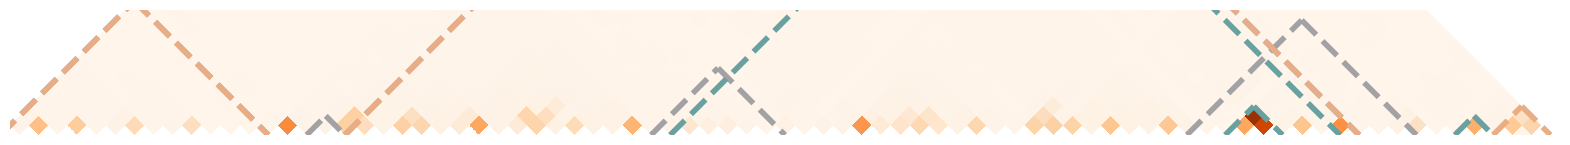

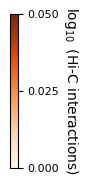

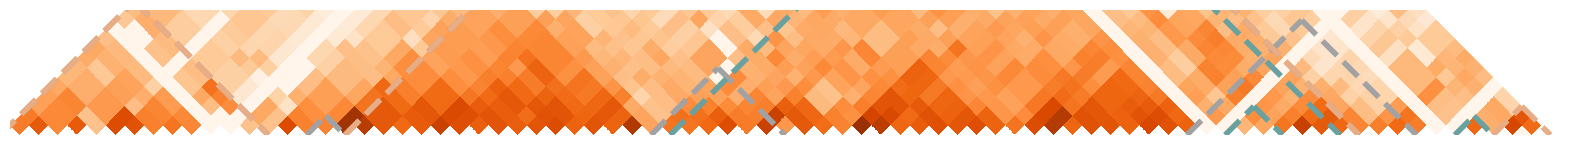

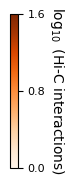

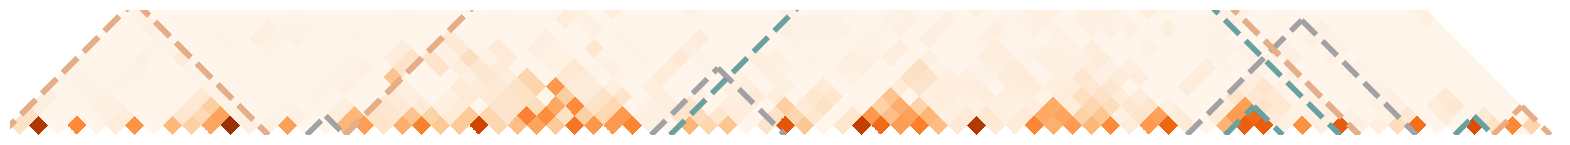

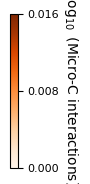

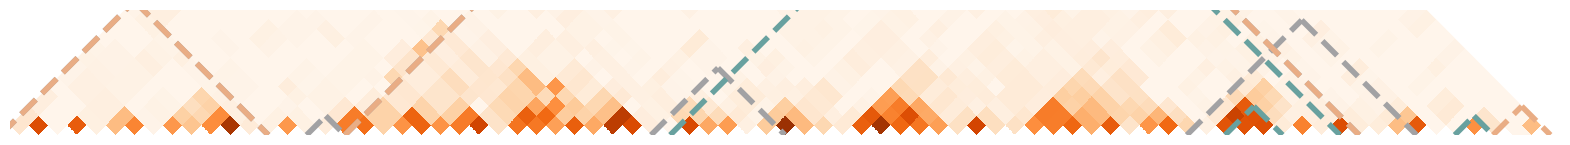

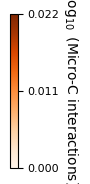

In [6]:
for interaction_type in interaction_types:
    for resolution in resolutions:
        fig_output_path = os.path.join(
            core_path, "plots", interaction_type, str(resolution) + "bp", dataset
        )
        if not os.path.exists(fig_output_path):
            os.makedirs(fig_output_path)
        query = zip(
            target_regions["chr_id"],
            target_regions["start"],
            target_regions["end"],
            target_regions["pid"],
            target_regions["cm_id"],
            target_regions["rs_id"],
            target_regions["LD_rs_ids"],
        )
        for (
            chromosome,
            region_start,
            region_end,
            pid,
            repr_crds,
            rs_ids,
            ld_rs_ids,
        ) in query:
            crds_in_region = utils.get_cms_in_region(
                cm_path,
                "clomics",
                dataset,
                chromosome,
                region_start,
                region_end,
                fully_in=True,
                n_peaks=n_peaks,
                bg_threshold=bg_threshold,
            )
            vcms_in_region = utils.get_cms_in_region(
                cm_path,
                "vcmtools",
                dataset,
                chromosome,
                region_start,
                region_end,
                fully_in=True,
                vcm_window=vcm_window,
                pv_threshold=pv_threshold,
            )
            phms_in_region = utils.get_cms_in_region(
                cm_path,
                "phm",
                dataset,
                chromosome,
                region_start,
                region_end,
                fully_in=True,
                pp_threshold=pp_threshold,
            )
            crd_peak_dict = utils.get_cm_peak_dict(
                cm_peak_path, method="clomics", dataset=dataset
            )
            vcm_peak_dict = utils.get_cm_peak_dict(
                cm_peak_path, method="vcmtools", dataset=dataset
            )
            phm_peak_dict = utils.get_cm_peak_dict(
                cm_peak_path, method="phm", dataset=dataset
            )

            corr_df_for_viz = pmv.prepare_data_for_hic_heatmap(
                input_path=core_path,
                dataset=dataset,
                gene="_".join([pid, interaction_type, str(resolution)]),
                corr_file_name="interaction_matrix.txt",
            )
            crd_coordinates = pmv.get_cm_coordinates(
                corr_or_hic_peak_df=corr_df_for_viz,
                cm_dict=crd_peak_dict,
                cms_to_plot=crds_in_region,
                data_type="hic",
            )
            vcm_coordinates = pmv.get_cm_coordinates(
                corr_or_hic_peak_df=corr_df_for_viz,
                cm_dict=vcm_peak_dict,
                cms_to_plot=vcms_in_region,
                data_type="hic",
            )
            phm_coordinates = pmv.get_cm_coordinates(
                corr_or_hic_peak_df=corr_df_for_viz,
                cm_dict=phm_peak_dict,
                cms_to_plot=phms_in_region,
                data_type="hic",
            )
            if interaction_type == "HiC":
                interaction_name = "Hi-C"
            elif interaction_type == "MicroC":
                interaction_name = "Micro-C"
            pmv.plot_hic_peak_heatmap(
                resolution,
                dataset,
                hic_data=corr_df_for_viz,
                line_width=4,
                ylim_fraction=0.6,
                vmax_norm=corr_df_for_viz.max().max()
                + 0.1 * corr_df_for_viz.max().max(),
                save_fig=True,
                crd_coordinates=crd_coordinates,
                vcm_coordinates=vcm_coordinates,
                phm_coordinates=phm_coordinates,
                cbar_label="$\\log_{10}$ (" + interaction_name + " interactions)",
                suffix="_".join(
                    [
                        pid,
                        interaction_type,
                        str(resolution),
                        "vcmtools",
                        "clomics",
                        "phm",
                        "CMs",
                    ]
                ),
                output_path=fig_output_path,
            )